<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/dchW5D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis

Use pandas to load the dataset and examine the first few rows.

Check and handle the missing values.

Drop any unnecessary column

Create a Countplot to display diagnosis from magma


Data Preprocessing, Building Models and Evaluation :

counts of unique rows in the ‘diagnosis’ column

map categorical values to numerical values

Splitting the data into train and test

Implement logistic regression and print the accuracy.

Implement K Nearest Neighbours and print the accuracy.

Implement Random Forests and print the accuracy.

Implement Support Vector Machines (SVM) and print the accuracy.

Which is the best model ?

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from google.colab import files
uploaded = files.upload()
# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


In [31]:
df = pd.read_csv('data.csv')

In [32]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [34]:
#drop Unnamed: 32
df.drop('Unnamed: 32',axis=1,inplace=True)

In [35]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


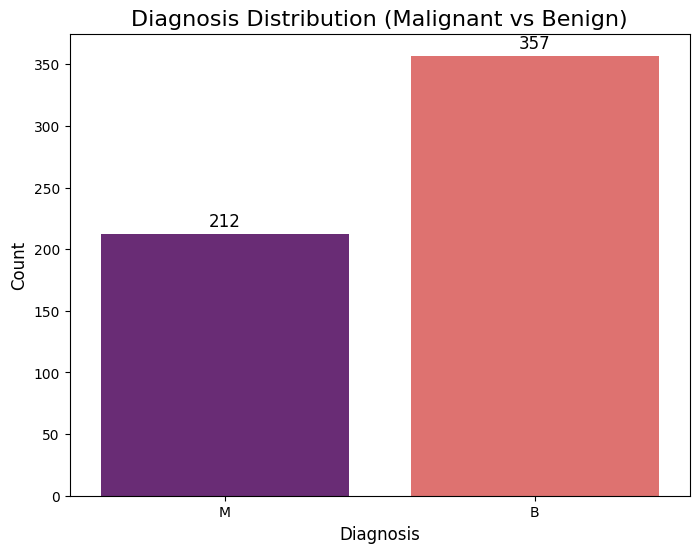

In [36]:
# Create the countplot with the hue parameter
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='magma', hue='diagnosis', legend=False)

# Add title and labels
plt.title('Diagnosis Distribution (Malignant vs Benign)', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add sums on top of each bar
for p in ax.patches:
    # Get the height of each bar and display the count on top
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2, height + 3,  # Positioning the text
        f'{int(height)}',  # The text to display
        ha='center',  # Horizontal alignment of text
        va='bottom',  # Vertical alignment of text
        fontsize=12, color='black'
    )

# Display the plot
plt.show()

In [37]:
# Check the counts of unique values in the 'diagnosis' column
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)

diagnosis
B    357
M    212
Name: count, dtype: int64


In [38]:
# Mapping 'M' to 1 (Malignant) and 'B' to 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check the result
print(df['diagnosis'].head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = df.drop(columns=['diagnosis', 'id'])  # Features (excluding diagnosis and ID)
y = df['diagnosis']  # Target variable (diagnosis)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9561

Confusion Matrix:
[[70  1]
 [ 4 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



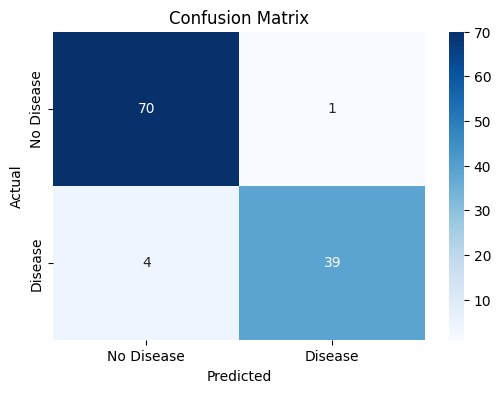

Logistic Regression Accuracy: 95.61%


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Implement Logistic Regression
logreg = LogisticRegression(max_iter=10000)  # Increased max_iter to ensure convergence
logreg.fit(X_train, y_train)

# Predictions and accuracy
y_pred = logreg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print the accuracy
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler  # For scaling
from sklearn.model_selection import train_test_split

# Step 1: Scaling the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors=5, you can tune this value
knn.fit(X_train_scaled, y_train)

# Step 3: Predictions and accuracy
y_pred_knn = knn.predict(X_test_scaled)

# Calculate the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracy
print(f"K-Nearest Neighbors Accuracy (with scaling): {accuracy_knn * 100:.2f}%")

K-Nearest Neighbors Accuracy (with scaling): 94.74%


Accuracy: 0.9649

Confusion Matrix:
[[70  1]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



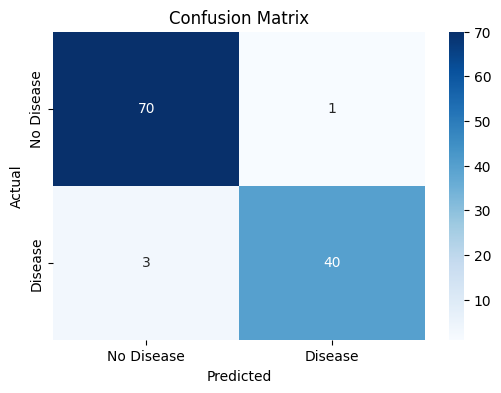

RandomForestClassifier Accuracy: 96.49%


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_rf)  # Use y_pred_rf here
conf_matrix = confusion_matrix(y_test, y_pred_rf)  # Use y_pred_rf here
class_report = classification_report(y_test, y_pred_rf)  # Use y_pred_rf here

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print the accuracy
print(f"RandomForestClassifier Accuracy: {accuracy * 100:.2f}%")


In [43]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Initialize the scaler
scaler = StandardScaler()

# Scale the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # Using a linear kernel for simplicity

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracy
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

SVM Accuracy: 95.61%


In this case the best ML model is Random Forest classifier (accuracy is 96.49%)